**classf2 - Modelo 4**
Para identificar si el uso (proceso) de una máquina está siendo por debajo del uso "optimo" al fabricar una referencia y por tanto, costando dinero

In [48]:
import sys
import os

sys.path.append(os.path.abspath('../package'))
%load_ext autoreload
%autoreload 2

from functions.data_loader import load_excel_data
file = "../../data/BASE DE DATOS PCC_cleaned.xlsx"
df_char = load_excel_data(file)
df_model = df_char.copy()

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
Archivo cargado correctamente desde ../../data/BASE DE DATOS PCC_cleaned.xlsx


In [49]:
group_columns = ['referencia','maquina','proceso'] #This are the columns to group by to compare similar work conditions

df_model['grupo'] = df_model[group_columns].astype(str).agg('-'.join, axis=1)
medians = df_model.groupby('grupo')['eficiencia_piezas_por_min'].transform('median') #Adding a little bit of robustness to the model by comparing with the median of similar groups

df_model['is_optimal_shift'] = df_model['eficiencia_piezas_por_min'] > medians


In [50]:

df_model.head(15)


,pedido,op,referencia,maquina,seccion,proceso,usuario,estado,fabricadas,fecha_inicio,...,dia_inicio,hora_inicio,dia_semana_inicio,dia_fin,hora_fin,dia_semana_fin,eficiencia_piezas_por_min,turno,grupo,is_optimal_shift
0,27075,8235,PT-0000000388,MAQR700 - Maquina R700 6 color + barniz,Prensa,Barnizar,mmartinez,play,1.0,2023-08-01 09:39:49,...,2023-08-01,9,Tuesday,2023-08-01,10,Tuesday,0.016226,Mañana,PT-0000000388-MAQR700 - Maquina R700 6 color +...,False
1,27075,8235,PT-0000000388,MAQR700 - Maquina R700 6 color + barniz,Prensa,Barnizar,mmartinez,play,22760.0,2023-08-01 10:57:54,...,2023-08-01,10,Tuesday,2023-08-01,13,Tuesday,147.056923,Mañana,PT-0000000388-MAQR700 - Maquina R700 6 color +...,False
2,27075,8235,PT-0000000388,MAQR700 - Maquina R700 6 color + barniz,Prensa,Barnizar,mmartinez,play,7140.0,2023-08-01 15:48:37,...,2023-08-01,15,Tuesday,2023-08-01,16,Tuesday,153.945666,Tarde,PT-0000000388-MAQR700 - Maquina R700 6 color +...,False
3,27075,8235,PT-0000000388,MAQR700 - Maquina R700 6 color + barniz,Prensa,Barnizar,falzate,play,43000.0,2023-08-01 21:00:17,...,2023-08-01,21,Tuesday,2023-08-02,0,Wednesday,215.107554,Noche,PT-0000000388-MAQR700 - Maquina R700 6 color +...,True
4,27075,8235,PT-0000000388,MAQR700 - Maquina R700 6 color + barniz,Prensa,Barnizar,falzate,play,20800.0,2023-08-02 00:00:00,...,2023-08-02,0,Wednesday,2023-08-02,1,Wednesday,345.629777,Noche,PT-0000000388-MAQR700 - Maquina R700 6 color +...,True
5,27075,8235,PT-0000000388,MAQR700 - Maquina R700 6 color + barniz,Prensa,Barnizar,acalderon,play,7540.0,2023-08-02 01:06:32,...,2023-08-02,1,Wednesday,2023-08-02,1,Wednesday,150.860344,Noche,PT-0000000388-MAQR700 - Maquina R700 6 color +...,False
6,27136,8311,PT-0000001497,MAQR700 - Maquina R700 6 color + barniz,Prensa,Barnizar,mmartinez,play,4580.0,2023-08-14 12:44:08,...,2023-08-14,12,Monday,2023-08-14,13,Monday,105.457057,Tarde,PT-0000001497-MAQR700 - Maquina R700 6 color +...,False
7,27136,8311,PT-0000001497,MAQR700 - Maquina R700 6 color + barniz,Prensa,Barnizar,falzate,play,45020.0,2023-08-14 19:31:49,...,2023-08-14,19,Monday,2023-08-14,21,Monday,439.219512,Tarde,PT-0000001497-MAQR700 - Maquina R700 6 color +...,True
8,27136,8311,PT-0000001497,MAQR700 - Maquina R700 6 color + barniz,Prensa,Barnizar,acalderon,play,50720.0,2023-08-15 02:04:16,...,2023-08-15,2,Tuesday,2023-08-15,5,Tuesday,269.744190,Noche,PT-0000001497-MAQR700 - Maquina R700 6 color +...,True
9,27144,8318,PT-0000001327,MAQR700 - Maquina R700 6 color + barniz,Prensa,Barnizar,acalderon,play,6750.0,2023-08-02 04:37:46,...,2023-08-02,4,Wednesday,2023-08-02,4,Wednesday,398.700532,Noche,PT-0000001327-MAQR700 - Maquina R700 6 color +...,True


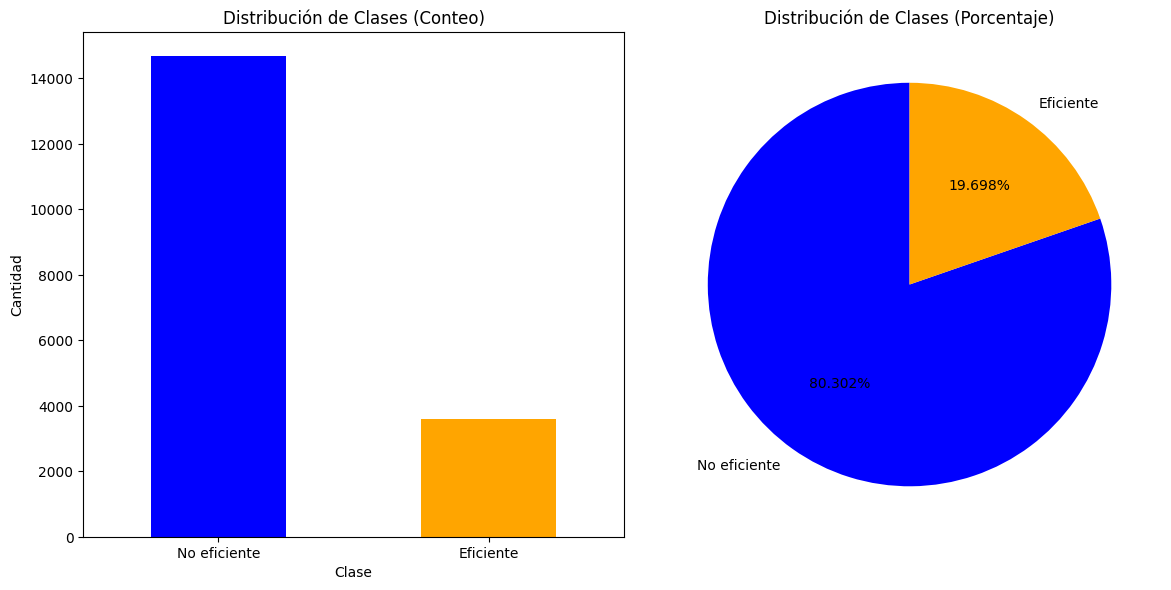

In [69]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Convertir y a Series (por si no lo es)
y_series = pd.Series(df_model["is_optimal_shift"])

# Define etiquetas para las clases (personaliza según tus etiquetas)
class_labels = ["No eficiente", "Eficiente"]

# Crear figura y subplots
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Conteo de clases (barras)
y_series.value_counts().sort_index().plot(
    kind='bar', color=['blue', 'orange'], ax=axes[0]
)
axes[0].set_title('Distribución de Clases (Conteo)')
axes[0].set_xlabel('Clase')
axes[0].set_ylabel('Cantidad')
axes[0].set_xticklabels(class_labels, rotation=0)

# Porcentaje de clases (pastel)
y_series.value_counts().sort_index().plot.pie(
    autopct='%.3f%%',
    ax=axes[1],
    colors=['blue', 'orange'],
    startangle=90,
    labels=class_labels
)
axes[1].set_title('Distribución de Clases (Porcentaje)')
axes[1].set_ylabel('')  # Elimina etiqueta del eje y para pie

plt.tight_layout()
plt.show()


In [51]:
from functions.data_preparation import prepare_classification_data


features = {
    'fabricadas': 'numeric',
    'referencia': 'categorical',
    'maquina': 'categorical',
    'proceso': 'categorical',
}

X_train, X_test, y_train, y_test, _, _, _ = prepare_classification_data(
    df=df_model,
    feature_types=features,
    target_column='is_optimal_shift',
    test_size=0.2,
    random_state=42,
    scale_numeric=True
)


Data prepared: 14608 training samples, 3653 test samples.
Categorical features encoded: ['referencia', 'maquina', 'proceso']


In [52]:
from functions.data_preparation import select_features_logistic
significant_features, _ = select_features_logistic(X_train, y_train)

Logistic Regression p-values:
fabricadas    1.763422e-159
referencia     2.689573e-05
maquina        3.149611e-35
proceso       1.610419e-168
dtype: float64

Significant features (p <= 0.05):
['fabricadas', 'referencia', 'maquina', 'proceso']


In [53]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier

models = {
    'LogisticRegression': {
        'model': LogisticRegression(max_iter=1000, random_state=42,fit_intercept=True), 
        'params': {
            'C': [0.01, 0.1, 1, 10, 100],   # regularization strength
            'penalty': ['l2'],              # l1 requiere solver='liblinear', podrías agregar si querés
            'solver': ['lbfgs']             # para l2, multiclass soportado
        }
    },
    'RandomForest': {
        'model': RandomForestClassifier(random_state=42),
        'params': {
            'n_estimators': [50, 100],
            'max_depth': [None, 10, 20],
            'min_samples_split': [2, 5]
        }
    },
    'GradientBoosting': {
        'model': GradientBoostingClassifier(random_state=42),
        'params': {
            'n_estimators': [50, 100],
            'learning_rate': [0.05, 0.1],
            'max_depth': [3, 5]
        }
    },
    'KNN': {
        'model': KNeighborsClassifier(),
        'params': {
            'n_neighbors': [1,3, 5, 7, 9, 11,15,20],
            'weights': ['uniform', 'distance'],
            'p': [1, 2]  # 1 = Manhattan, 2 = Euclidean
        }
    },
    'DecisionTree': {
        'model': DecisionTreeClassifier(random_state=42),
        'params': {
            'max_depth': [None,2, 5, 10, 20],
            'min_samples_split': [2, 5, 10]
        }
    }
}


In [54]:
#Entrenar ahora si el encoder y scaler con las variables seleccionadas
significant_features_dict = {col: features[col] for col in significant_features}

X_train_selected, X_test_selected, y_train_selected, y_test_selected, encoder_X, encoder_y, scaler = prepare_classification_data(
    df=df_model,
    feature_types=significant_features_dict,
    target_column='is_optimal_shift',
    test_size=0.2,
    random_state=42,
    scale_numeric=True
)


Data prepared: 14608 training samples, 3653 test samples.
Categorical features encoded: ['referencia', 'maquina', 'proceso']


In [55]:
from functions.model_evaluation import evaluate_classification_models

tuned_results, summary_metrics, all_grid_results, best_models = evaluate_classification_models(
    models=models,
    X_train=X_train_selected,
    y_train=y_train,
    X_test=X_test_selected,
    y_test=y_test,
    scoring="roc_auc_ovr_weighted",  # or 'accuracy', 'f1_weighted', etc.
    cv=5
)


Evaluating: LogisticRegression
Best Params          {'C': 10, 'penalty': 'l2', 'solver': 'lbfgs'}
ROC AUC CV                                                0.833068
PR AUC CV                                                 0.479345
Accuracy CV                                                0.80853
Precision CV                                               0.77506
Recall CV                                                  0.80853
F1 Score CV                                               0.777397
ROC AUC Test                                              0.834207
PR AUC Test                                               0.501597
Accuracy Test                                             0.810567
Precision Test                                            0.777412
Recall Test                                               0.810567
F1 Score Test                                              0.77766
Training Time (s)                                         6.449682
dtype: object


Evaluating: Ran

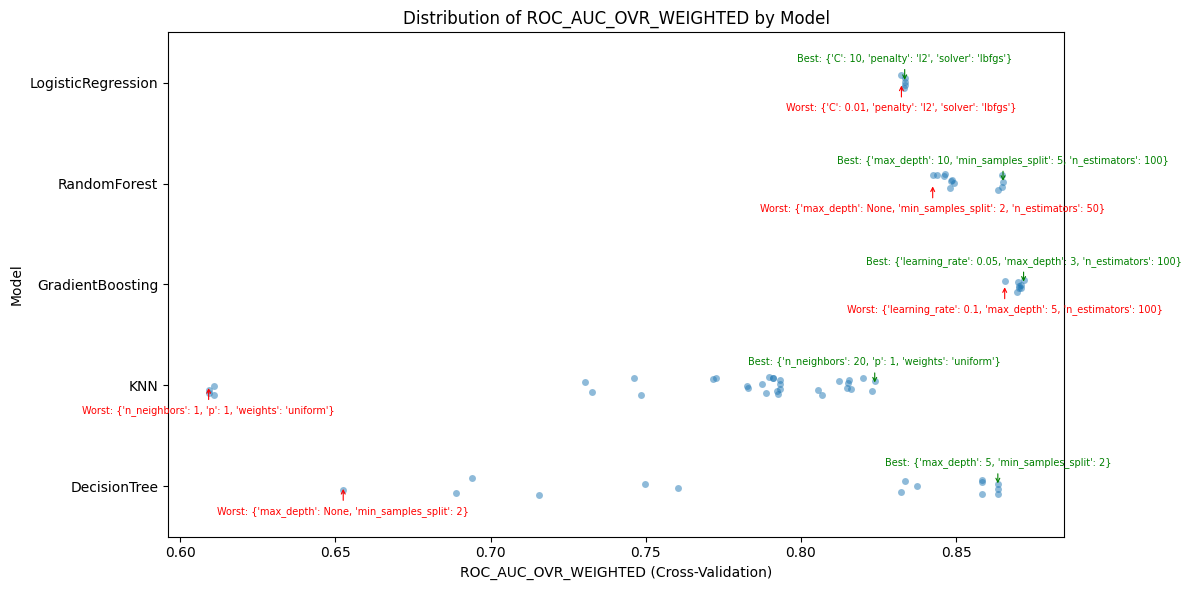

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_penalty,param_solver,params,split0_test_score,split1_test_score,...,rank_test_score,Model,param_max_depth,param_min_samples_split,param_n_estimators,param_learning_rate,param_n_neighbors,param_p,param_weights,roc_auc_ovr_weighted
0,0.090380,0.015493,0.009089,0.002887,0.01,l2,lbfgs,"{'C': 0.01, 'penalty': 'l2', 'solver': 'lbfgs'}",0.827006,0.823914,...,5,LogisticRegression,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.832382
1,0.063518,0.011769,0.005395,0.001241,0.10,l2,lbfgs,"{'C': 0.1, 'penalty': 'l2', 'solver': 'lbfgs'}",0.827764,0.825286,...,4,LogisticRegression,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.833332
2,0.063806,0.021505,0.006262,0.002046,1.00,l2,lbfgs,"{'C': 1, 'penalty': 'l2', 'solver': 'lbfgs'}",0.827838,0.825424,...,3,LogisticRegression,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.833430
3,0.076868,0.013173,0.006656,0.001041,10.00,l2,lbfgs,"{'C': 10, 'penalty': 'l2', 'solver': 'lbfgs'}",0.827839,0.825436,...,1,LogisticRegression,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.833437
4,0.078888,0.010997,0.006755,0.001217,100.00,l2,lbfgs,"{'C': 100, 'penalty': 'l2', 'solver': 'lbfgs'}",0.827839,0.825436,...,2,LogisticRegression,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.833436
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
67,0.044430,0.044414,0.005638,0.001576,NaN,NaN,NaN,"{'max_depth': 10, 'min_samples_split': 5}",0.838853,0.813936,...,8,DecisionTree,10,5.0,NaN,NaN,NaN,NaN,NaN,0.833431
68,0.022969,0.002323,0.010784,0.011497,NaN,NaN,NaN,"{'max_depth': 10, 'min_samples_split': 10}",0.842043,0.824365,...,7,DecisionTree,10,10.0,NaN,NaN,NaN,NaN,NaN,0.837501
69,0.035668,0.007923,0.005852,0.000937,NaN,NaN,NaN,"{'max_depth': 20, 'min_samples_split': 2}",0.700292,0.682933,...,14,DecisionTree,20,2.0,NaN,NaN,NaN,NaN,NaN,0.688737
70,0.039930,0.009602,0.008064,0.002819,NaN,NaN,NaN,"{'max_depth': 20, 'min_samples_split': 5}",0.725696,0.709205,...,12,DecisionTree,20,5.0,NaN,NaN,NaN,NaN,NaN,0.715510


In [56]:
from functions.plotter import plot_cv_metric_distribution
plot_cv_metric_distribution([all_grid_results], metric_name="roc_auc_ovr_weighted", maximize=True)

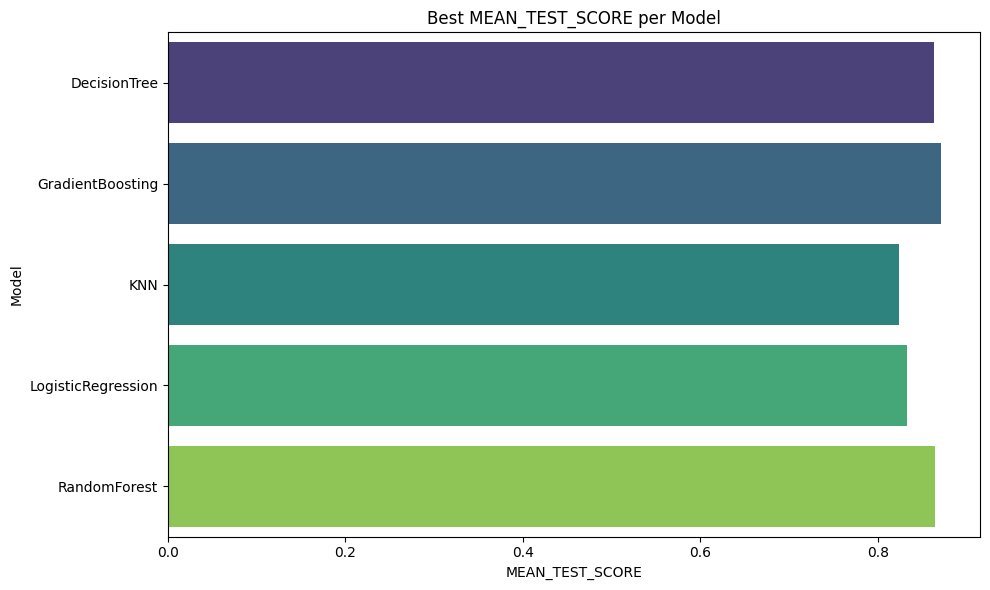

In [57]:
from functions.plotter import plot_best_metric_per_model
best_rmse_df = plot_best_metric_per_model([all_grid_results], metric='mean_test_score', maximize=True)

In [58]:
from functions.model_transformer import CustomPreprocessor
preprocessor = CustomPreprocessor(encoder_X, scaler, significant_features_dict)

In [59]:
from functions.save_models import save_pipeline_models_categorical_y
save_path = "./results/classf2"
save_pipeline_models_categorical_y(preprocessor,encoder_y, best_models, save_path)

Guardado: ./results/classf2\LogisticRegression_pipeline.joblib
Guardado: ./results/classf2\RandomForest_pipeline.joblib
Guardado: ./results/classf2\GradientBoosting_pipeline.joblib
Guardado: ./results/classf2\KNN_pipeline.joblib
Guardado: ./results/classf2\DecisionTree_pipeline.joblib


In [60]:
#Cargar el dataset de nuevo - Solo para probar el comportamiento del modelo graficamente
from sklearn.model_selection import train_test_split
from functions.data_loader import load_excel_data
file = "../../data/BASE DE DATOS PCC_cleaned.xlsx"
df_char = load_excel_data(file)



group_columns = ['referencia','maquina','proceso'] #This are the columns to group by to compare similar work conditions

df_char['grupo'] = df_char[group_columns].astype(str).agg('-'.join, axis=1)
medians = df_char.groupby('grupo')['eficiencia_piezas_por_min'].transform('median') #Adding a little bit of robustness to the model by comparing with the median of similar groups

df_char['is_optimal_shift'] = df_char['eficiencia_piezas_por_min'] > medians

X = df_char[significant_features]
y = df_char['is_optimal_shift']

X_train_original = X.loc[X_train_selected.index]
X_test_original = X.loc[X_test_selected.index]
y_train_original = y.loc[X_train_selected.index]
y_test_original = y.loc[X_test_selected.index]

Archivo cargado correctamente desde ../../data/BASE DE DATOS PCC_cleaned.xlsx


In [61]:
#Comportamiento del mejor modelo (menor RMSE) - o el modelo que se quiere ver
from joblib import load
from sklearn.pipeline import Pipeline
model_name = "GradientBoosting"
# Ruta al archivo
pipeline_path = os.path.join("results", "classf2", f"{model_name}_pipeline.joblib")

# Cargar el pipeline completo (encoderX + encoderY + scaler + modelo)
saved = load(pipeline_path)

pipeline = saved["pipeline"]         # pipeline con preprocessor + modelo
target_encoder = saved["target_encoder"]

y_train_pred_encoded = pipeline.predict(X_train_original)
y_test_pred_encoded = pipeline.predict(X_test_original)


# Si target_encoder está, puedes revertir la codificación (por ejemplo si y fue ordinal codificado)
if target_encoder is not None:
    y_train_pred = target_encoder.inverse_transform(y_train_pred_encoded.reshape(-1, 1))
    y_test_pred = target_encoder.inverse_transform(y_test_pred_encoded.reshape(-1, 1))
else:
    y_train_pred = y_train_pred_encoded
    y_test_pred = y_test_pred_encoded



C:\Users\yosse\AppData\Roaming\Python\Python310\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but GradientBoostingClassifier was fitted with feature names
  warnings.warn(
C:\Users\yosse\AppData\Roaming\Python\Python310\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but GradientBoostingClassifier was fitted with feature names
  warnings.warn(


In [62]:
#Solo para comprobar funcionamiento correcto del model transformer
import pandas as pd

# Transformar con el preprocessor (numpy array)
X_transformed = pipeline.named_steps['preprocessor'].transform(X_train_original)


# Convertir a DataFrame con esos nombres
df_transformed = pd.DataFrame(X_transformed, columns=significant_features, index=X_train_original.index)

print(df_transformed.head())
print("-"*50)
print(X_train_selected.head())



       fabricadas  referencia  maquina  proceso
15501   -0.529429       168.0      7.0     16.0
183     -0.198073       144.0      6.0      2.0
7891    -0.414886       197.0     10.0     15.0
3930    -0.365797        94.0      1.0     10.0
2766     2.771858       370.0      7.0      7.0
--------------------------------------------------
       fabricadas  referencia  maquina  proceso
15501   -0.529429       168.0      7.0     16.0
183     -0.198073       144.0      6.0      2.0
7891    -0.414886       197.0     10.0     15.0
3930    -0.365797        94.0      1.0     10.0
2766     2.771858       370.0      7.0      7.0


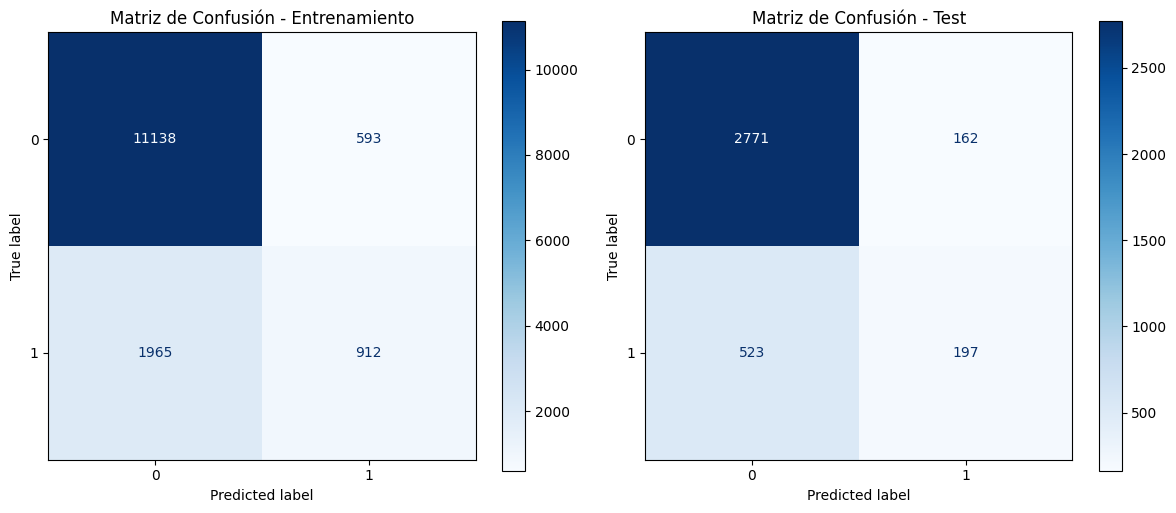

In [63]:
from functions.plotter import plot_confusion_matrices_separated

plot_confusion_matrices_separated(y_train=y_train_original,y_pred_train=y_train_pred,y_test=y_test_original,y_pred_test=y_test_pred)

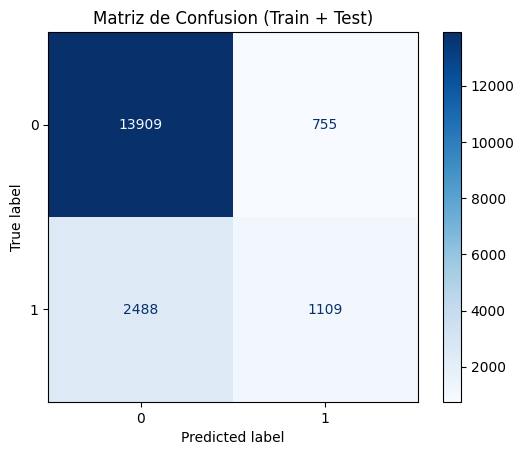

In [65]:
from functions.plotter import plot_combined_confusion_matrix


plot_combined_confusion_matrix(y_train=y_train_original,y_pred_train=y_train_pred,y_test=y_test_original,y_pred_test=y_test_pred)

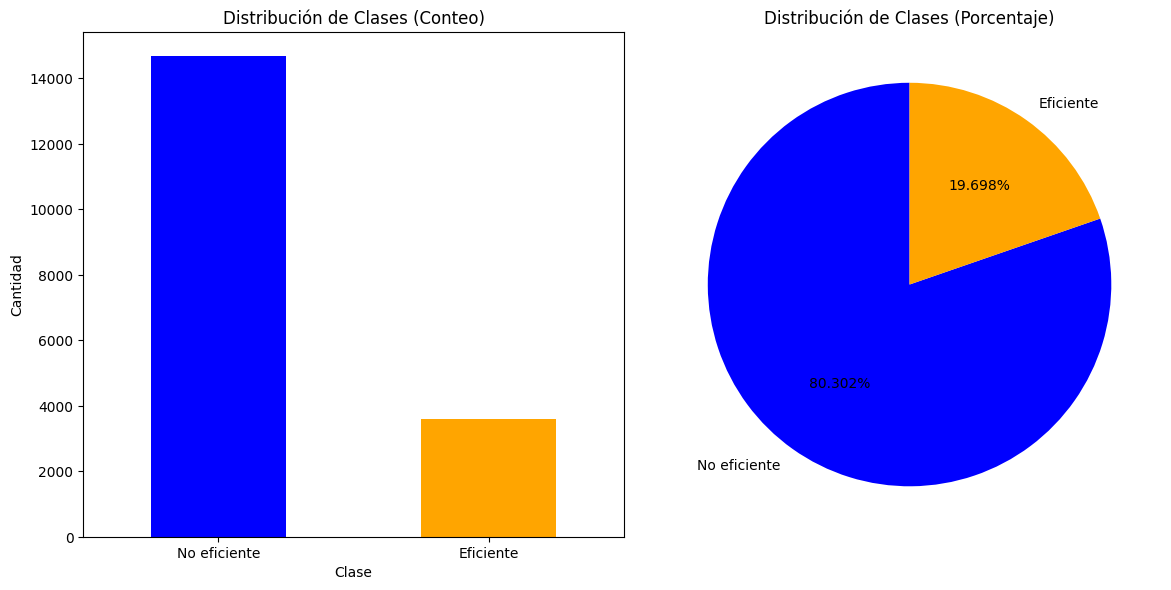